In [2]:
%matplotlib inline
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
table = pd.read_csv('Answerrating.csv')

In [32]:
char_min = 100
char_max = 429
table['normalised_char_count_ques'] = table['qn'].map(lambda x: float(x - char_min)/(char_max - char_min) if x < char_max and x > char_min else
0 if x < char_min else 1)
print char_min
print char_max

100
429


In [33]:
char_min = 29
char_max = 1300
table['normalised_char_count_ans'] = table['answer'].map(lambda x: float(x - char_min)/(char_max - char_min) if x < char_max and x > char_min else
0 if x < char_min else 1)
print char_min
print char_max

29
1300


In [34]:
table.head()

,text,text.1,qn,answer,rating,normalised_char_count_ques,normalised_char_count_ans
0,My mom has to get teeth filling done..Do filli...,If you teeth have cavities they need fillings....,109,146,3,0.027356,0.092054
1,My child fell down yesterday and broke his you...,Baby teeth are precursors to adult teeth. A fa...,130,304,5,0.091185,0.216365
2,I am going to a photo shoot in 3 days... I wan...,Yes! Dental bleaching is commonly done for imp...,123,248,1,0.069909,0.172305
3,My grandson says that taking out front teeth c...,"Believe it or not, this is one of the most com...",101,216,5,0.003040,0.147128
4,My child has pain in lower molar. Has not been...,I'm very sorry to hear that. the child is prob...,108,283,5,0.024316,0.199843


In [35]:
table[['rating', 'normalised_char_count_ans']].corr()

,rating,normalised_char_count_ans
rating,1.000000,0.133349
normalised_char_count_ans,0.133349,1.000000


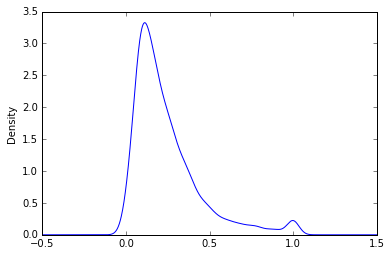

In [36]:
table["normalised_char_count_ans"].plot(kind='kde')

In [15]:
import numpy as np

In [31]:
np.percentile(table["answer"], 98)

1213.5199999999977

In [37]:
len(table)

6087

In [38]:
np.array(table[["normalised_char_count_ans"]])

array([[ 0.0920535 ],
       [ 0.21636507],
       [ 0.17230527],
       ..., 
       [ 1.        ],
       [ 0.11250983],
       [ 0.07159717]])

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression(fit_intercept=True, n_jobs=-1)

In [41]:
lr = lr.fit(np.array(table[["normalised_char_count_ans"]]), table["rating"].values)

In [42]:
lr.coef_

array([ 0.7081829])

In [43]:
total = 0
for x in table["rating"] - lr.predict(np.array(table[["normalised_char_count_ans"]])):
    total += x*x

In [44]:
print(np.sqrt((float(1)/len(table)) * total))

1.06407373827


In [45]:
lr.intercept_

3.5374343478593597

In [46]:
table[["rating", "normalised_char_count_ans", "normalised_char_count_ques"]].corr()

,rating,normalised_char_count_ans,normalised_char_count_ques
rating,1.000000,0.133349,0.001515
normalised_char_count_ans,0.133349,1.000000,0.054639
normalised_char_count_ques,0.001515,0.054639,1.000000


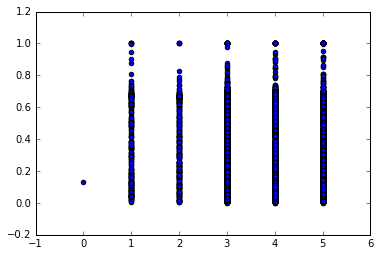

In [47]:
plt.scatter(table["rating"], table["normalised_char_count_ques"])

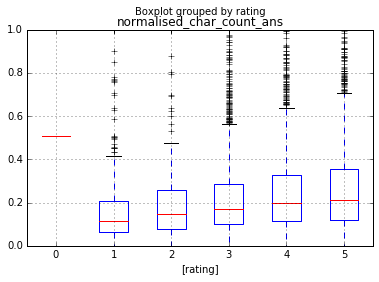

In [48]:
table[["rating", "normalised_char_count_ans"]].boxplot(by="rating")

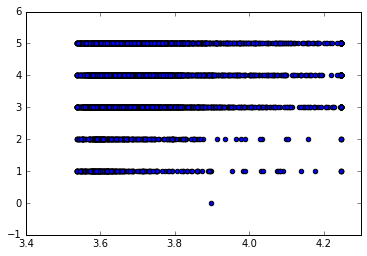

In [49]:
plt.scatter(lr.predict(np.array(table[["normalised_char_count_ans"]])), table["rating"])